### Import, pickle and comparison of 4 sets of initiation rates

In [1]:
%matplotlib inline
import os.path
import pandas as pd
import cPickle as pkl
import csv
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

datadir = "../data"

Initiation rates according to Shah, Plotkin et al. (http://www.ncbi.nlm.nih.gov/pubmed/23791185) (first version):

In [2]:
import math

V = 4.2e-17           # m^3 # cell volume
lambda_ribo = 3e-8                         # m # characteristic length ribosomes
D_ribo = 3e-13                             # m^2/s # diffusion coefficient of ribosomes
tau_ribo = lambda_ribo ** 2 / 6. / D_ribo  # s # char. time for ribosomes
num_pos_ribo = V / lambda_ribo ** 3        # number of discrete positions for ribosomes

In [3]:
file_plotkin = r"Plotkin_calc_IP_output.txt"
filepath_plotkin = os.path.join(datadir, file_plotkin)

with open(filepath_plotkin, mode='r') as infile:
    content = [line.split(',') for line in infile.readlines()[1:]]
    init_rates_plotkin = {elem[0]: float(elem[-1].strip()) / tau_ribo / num_pos_ribo
                          for elem in content if float(elem[-1].strip())>1E-80}

In [4]:
pd.Series(init_rates_plotkin).describe()

count    5.151000e+03
mean     1.951797e-06
std      3.877020e-06
min      4.593294e-09
25%      5.572144e-07
50%      1.071976e-06
75%      2.048380e-06
max      1.788067e-04
dtype: float64

Initiation rates according to Ciandrini, Stansfield et al. (2013) (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002866):

In [5]:
file_stansfield = r"p_init_Table_S1.csv"
filepath_stansfield = os.path.join(datadir, file_stansfield)
init_rates_stansfield = {}

with open(filepath_stansfield, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    for rows in reader:
        try:
            init_rates_stansfield[rows[0]] = float(rows[6].replace(',','.')) 
            # The initation rates from Ciandrini, Stansfield, Romano (2013) contain the ribosome availability
        except:
            pass

In [6]:
pd.Series(init_rates_stansfield).describe()

count    5841.000000
mean        0.120587
std         0.143086
min         0.004870
25%         0.055800
50%         0.090390
75%         0.138970
max         4.198550
dtype: float64

Function to plot two dictionaries by their values:

In [7]:
def scatter_dicts(dict1, dict2):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure()                

    ax = fig.add_subplot(111)
    ax.grid(True, linestyle = '-', color = '0.75')
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_xlabel('Stansfield initiation rates')
    #ax.set_ylabel('Plotkin initiation rates')

    scat = plt.scatter(xs, ys)
    scat.set_alpha(0.2)

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points]
    new_ys = [point[1] for point in sorted_points]
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, 'orange', linewidth=4)

    plt.show()

4874


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


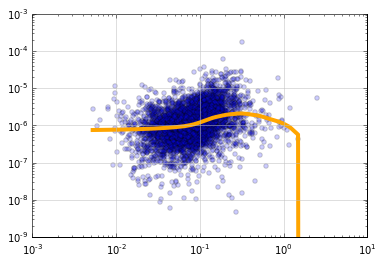

In [8]:
scatter_dicts(init_rates_stansfield, init_rates_plotkin)

Initiation rates according to Siwiak et al. (2010) (http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000865#s5):

In [9]:
file_siwiak = r'journal.pcbi.1000865.s003.CSV'
filepath_siwiak = os.path.join(datadir, file_siwiak)

with open(filepath_siwiak, mode='r') as infile:
    content = [line.split(',') for line in infile.readlines()[1:]]
    init_rates_siwiak = {elem[0]: float(elem[7]) for elem in content}
    orf_lengths = {elem[0]: float(elem[1]) for elem in content} # length of the transcript CDS in codons

In [10]:
pd.Series(init_rates_siwiak).describe()

count    4.621000e+03
mean     6.242752e-05
std      7.948070e-05
min      1.489429e-07
25%      2.023577e-05
50%      3.743325e-05
75%      7.006027e-05
max      8.783121e-04
dtype: float64

4420


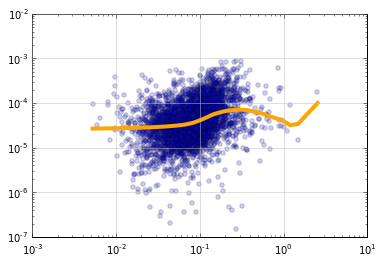

In [11]:
scatter_dicts(init_rates_stansfield, init_rates_siwiak)

4512


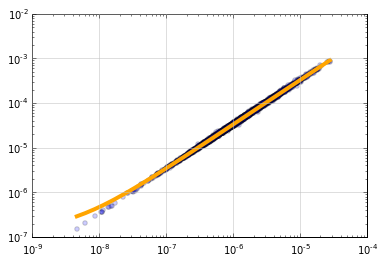

In [12]:
scatter_dicts(init_rates_plotkin, init_rates_siwiak)

Plot correlation between orf lengths and initiation rates:

In [13]:
pd.Series(orf_lengths).describe()

count    4621.000000
mean      519.238909
std       374.253029
min        37.000000
25%       270.000000
50%       433.000000
75%       664.000000
max      4911.000000
dtype: float64

4512


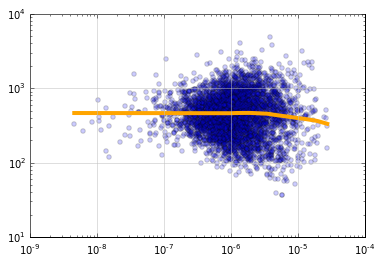

In [14]:
scatter_dicts(init_rates_plotkin, orf_lengths)

4621


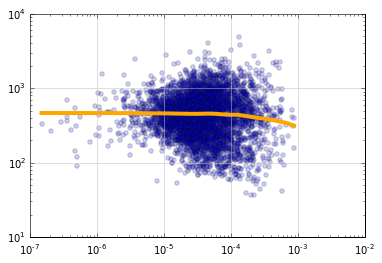

In [15]:
scatter_dicts(init_rates_siwiak, orf_lengths)

4420


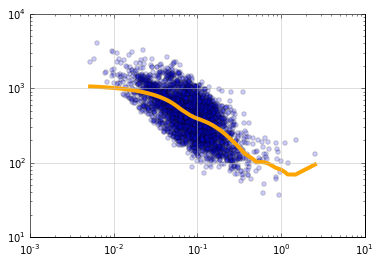

In [16]:
scatter_dicts(init_rates_stansfield, orf_lengths)

Initiation rates according to Plotkin et al. (private email from 17 June 2015):

In [17]:
file_plotkin2 = r"ingolia_recomputed_IPs.txt"
filepath_plotkin2 = os.path.join(datadir, file_plotkin2)

with open(filepath_plotkin2, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    init_rates_plotkin2 = {elem[0]: float(elem[5].strip()) / tau_ribo / num_pos_ribo
                           for elem in content if float(elem[5].strip())>1E-80}

In [18]:
pd.Series(init_rates_plotkin2).describe()

count    2.569000e+03
mean     2.468432e-06
std      3.943070e-06
min      8.973148e-08
25%      7.294157e-07
50%      1.284344e-06
75%      2.631287e-06
max      7.886130e-05
dtype: float64

2569


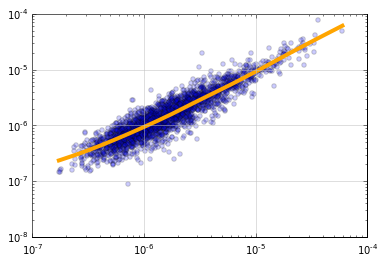

In [19]:
scatter_dicts(init_rates_plotkin, init_rates_plotkin2)

The error leads to a rather mild modification of initiation rates.

Third version of initiation rates sent by Premal Shah (private email, Sept 30, 2015):

In [23]:
file_plotkin3 = r"weinberg_etal_data.tsv"
filepath_plotkin3 = os.path.join(datadir, file_plotkin3)

with open(filepath_plotkin3, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    init_rates_plotkin3 = {elem[0]: float(elem[5].strip()) / tau_ribo / num_pos_ribo
                           for elem in content if float(elem[5].strip())>1E-80}

Test to see whether this worked (take values directly, no translation to rates):

In [27]:
with open(filepath_plotkin3, mode='r') as infile:
    content = [line.split('\t') for line in infile.readlines()[1:]] # skip header row
    init_probs_plotkin3 = {elem[0]: float(elem[5].strip())
                           for elem in content if float(elem[5].strip())>1E-80}

In [28]:
pd.Series(init_probs_plotkin3.values()).describe()

count    4.839000e+03
mean     1.219343e-03
std      8.775381e-04
min      7.292263e-07
25%      6.471517e-04
50%      1.004789e-03
75%      1.526703e-03
max      1.120499e-02
dtype: float64

There seems to be one outlier, and the rest of the distribution is much narrower than in previous deliveries by the Plotkin group.

4839


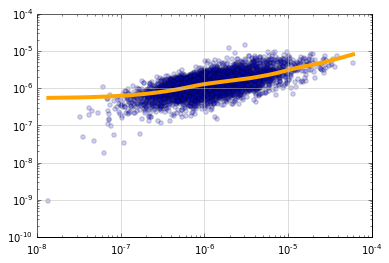

2569


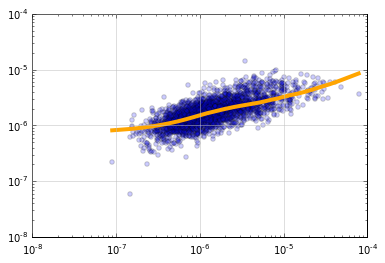

In [21]:
scatter_dicts(init_rates_plotkin, init_rates_plotkin3)
scatter_dicts(init_rates_plotkin2, init_rates_plotkin3)

In [22]:
pkl.dump(init_rates_stansfield, open("../parameters/init_rates_stansfield.p", "wb"))
pkl.dump(init_rates_plotkin, open("../parameters/init_rates_plotkin_old_1.p", "wb"))
pkl.dump(init_rates_plotkin2, open("../parameters/init_rates_plotkin_old_2.p", "wb"))
pkl.dump(init_rates_plotkin3, open("../parameters/init_rates_plotkin.p", "wb"))
pkl.dump(init_rates_siwiak, open("../parameters/init_rates_siwiak.p", "wb"))